In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
import pandas as pd
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
print(tf.__version__)

2.6.2


In [3]:
trainRawData = pd.read_csv('../input/digit-recognizer/train.csv')
testRawData = pd.read_csv('../input/digit-recognizer/test.csv')

train_label = trainRawData['label']
train_label = to_categorical(train_label)

train_data = (trainRawData.iloc[:, 1:].values.astype('float32') / 255.0 ).reshape(-1, 28, 28, 1)
test_data = (testRawData.iloc[:,:].values.astype('float32') / 255.0 ).reshape(-1, 28, 28, 1)

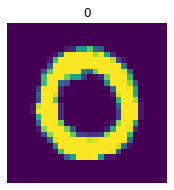

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
def show_as_img(data,label):
    ax = plt.subplot(3, 3, 1)
    plt.imshow(data)
    plt.title(label)
    plt.axis("off")
    
show_as_img((trainRawData.iloc[1:2, 1:].values.astype('uint8')).reshape(28, 28, 1), trainRawData['label'][1] )

In [5]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_label, val_label = train_test_split(train_data, train_label, shuffle=True, test_size = 0.1, stratify = train_label)
#stratify: 데이터가 쏠려서 분배되는 것 방지

In [6]:
model_1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, 3, input_shape=(28, 28, 1), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128,  activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
  tf.keras.layers.Dense(10, activation='softmax')
])


User settings:

   KMP_AFFINITY=granularity=fine,noverbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER

In [7]:
model = model_1
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'])
# loss='categorical_crossentropy' -->원핫 인코딩(one-hot encoding) 시 사용하는 손실함수
# loss='sparse_categorical_crossentropy 
#-->정수값 [0,1,2], 단 multiclass multilabel classification같은 하나의 input이 여러 class에 속할 수 있는 경우 사용불가

In [8]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(
  train_input, train_label,
  validation_data=(val_input, val_label),
  epochs=20,
  callbacks=[callback]
)

2022-02-01 02:13:27.797303: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
1182/1182 [==============================] - 10s 8ms/step - loss: 0.1877 - accuracy: 0.9438 - val_loss: 0.0833 - val_accuracy: 0.9729
Epoch 2/20
1182/1182 [==============================] - 9s 8ms/step - loss: 0.0587 - accuracy: 0.9828 - val_loss: 0.0565 - val_accuracy: 0.9814
Epoch 3/20
1182/1182 [==============================] - 10s 9ms/step - loss: 0.0361 - accuracy: 0.9884 - val_loss: 0.0467 - val_accuracy: 0.9850
Epoch 4/20
1182/1182 [==============================] - 9s 8ms/step - loss: 0.0238 - accuracy: 0.9922 - val_loss: 0.0521 - val_accuracy: 0.9831
Epoch 5/20
1182/1182 [==============================] - 9s 8ms/step - loss: 0.0137 - accuracy: 0.9960 - val_loss: 0.0460 - val_accuracy: 0.9867
Epoch 6/20
1182/1182 [==============================] - 9s 8ms/step - loss: 0.0114 - accuracy: 0.9963 - val_loss: 0.0492 - val_accuracy: 0.9848
Epoch 7/20
1182/1182 [==============================] - 11s 9ms/step - loss: 0.0088 - accuracy: 0.9970 - val_loss: 0.0664 - val_accura

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.evaluate(val_input,val_label)

132/132 [==============================] - 0s 3ms/step - loss: 0.0611 - accuracy: 0.9867


[0.06105959042906761, 0.9866666793823242]

In [11]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

(0.0, 0.19699440876138397)

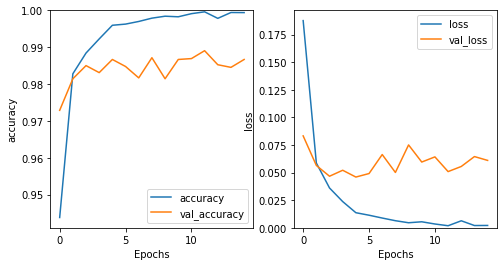

In [12]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [13]:
x_test = testRawData.to_numpy().reshape(testRawData.shape[0], 28,28,1)
print(x_test.shape)

(28000, 28, 28, 1)


In [14]:
prediction = model.predict(x_test)
prediction = np.argmax(prediction,axis=1)
print(prediction)

[2 0 9 ... 3 9 2]
